<a href="https://colab.research.google.com/github/MohamedElhossin/Simple_NLP_Project/blob/master/NLP_Project.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
%matplotlib inline
import matplotlib.pyplot as plt
import seaborn as sns
import matplotlib.pyplot as plt; plt.rcdefaults()
import numpy as np
sns.set_style('darkgrid')
sns.set(font_scale=1.5)

In [ ]:
# Read data 
dataset_df = pd.read_excel('Dataset.xlsx')

# Get the dataset columns and convert it to lower case  
dataset_df.columns = [col.lower() for col in dataset_df]
#-->print(dataset_df.columns)

# Rename the columns full text reviews and tittle of reviews
dataset_df.rename(columns={
        'full text reviews ': 'full text reviews', 
        'title of reviews ': 'title of reviews'
    }, inplace=True)
#-->print(dataset_df.columns)



In [ ]:
# Seprate the last columns 
reviews_df = dataset_df.iloc[:,[2,3,4]]
#-->print(reviews_df .columns)

#check the null values
#-->print(reviews_df.isnull().sum())

#drop the null values and rest the index 
reviews_df.dropna(inplace= True)
reviews_df.reset_index(drop=True, inplace=True)
#-->print(reviews_df.isnull().sum())



/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


In [ ]:
# label the reviews is good or bad 
# good when rating of reviews > 3 
# bad when rating reviews <= 3

reviews_df["is good review"] = reviews_df["rating of reviews"].apply(lambda x: 1 if x > 3 else 0)
#-->print(reviews_df.head(10))




/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


In [ ]:
#Get the count of good review
# if 1 is good
# else is bad 
reviews_df["is good review"].value_counts()

1    1072
0     120
Name: is good review, dtype: int64

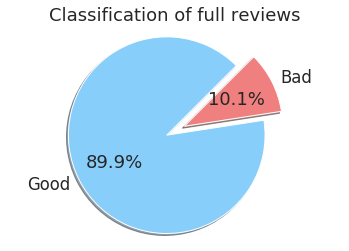

In [ ]:
# represent  the percentage of good/bad reviews  
labels = 'Good', 'Bad'
sizes = [1072, 120,]
colors = ['lightskyblue','lightcoral']
explode = (0.2, 0)  # explode 1st slice

# Plot
plt.pie(sizes, explode=explode, labels=labels, colors=colors,
autopct='%1.1f%%', shadow=True, startangle=45)
plt.title('Classification of full reviews')

plt.axis('equal')
plt.show()

In [ ]:
# Clean the data 
# lower the text
# tokenize the text (split the text into words) and remove the punctuation
# remove useless words that contain numbers
# remove useless stop words like ‘the’, ‘a’ ,’this’ etc.
# Part-Of-Speech (POS) tagging: assign a tag to every word to define 
# if it corresponds to a noun, a verb etc. using the WordNet lexical database
# lemmatize the text: transform every word into their root form 

from nltk.corpus import wordnet

def get_wordnet_pos(pos_tag):
    if pos_tag.startswith('J'):
        return wordnet.ADJ
    elif pos_tag.startswith('V'):
        return wordnet.VERB
    elif pos_tag.startswith('N'):
        return wordnet.NOUN
    elif pos_tag.startswith('R'):
        return wordnet.ADV
    else:
        return wordnet.NOUN
        

In [ ]:
# install the nltk 
pip install nltk

In [ ]:
# download the needed package 
import nltk
nltk.download('averaged_perceptron_tagger')
nltk.download('wordnet')
nltk.download('stopwords')
nltk.download('vader_lexicon')
nltk.download('punkt')

[nltk_data] Downloading package averaged_perceptron_tagger to
[nltk_data]     /root/nltk_data...
[nltk_data]   Package averaged_perceptron_tagger is already up-to-
[nltk_data]       date!
[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package vader_lexicon to /root/nltk_data...
[nltk_data]   Package vader_lexicon is already up-to-date!
[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!


True

In [ ]:
import string
from nltk import pos_tag
from nltk.corpus import stopwords
from nltk.tokenize import WhitespaceTokenizer
from nltk.stem import WordNetLemmatizer

def clean_text(text):
    # lower text
    text = text.lower()
    # tokenize text and remove puncutation
    text = [word.strip(string.punctuation) for word in text.split(" ")]
    # remove words that contain numbers
    text = [word for word in text if not any(c.isdigit() for c in word)]
    # remove stop words
    stop = stopwords.words('english')
    text = [x for x in text if x not in stop]
    # remove empty tokens
    text = [t for t in text if len(t) > 0]
    # pos tag text
    pos_tags = pos_tag(text)
    # lemmatize text
    text = [WordNetLemmatizer().lemmatize(t[0], get_wordnet_pos(t[1])) for t in pos_tags]
    # remove words with only one letter
    text = [t for t in text if len(t) > 1]
    # join all
    text = " ".join(text)
    return(text)

In [ ]:
# call clean_text method 
reviews_df["reviews clean"] = reviews_df["full text reviews"].apply(lambda x: clean_text(x))
#-->print(reviews_df.head(10))

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


In [ ]:
# add sentiment anaylsis columns
from nltk.sentiment.vader import SentimentIntensityAnalyzer

sid = SentimentIntensityAnalyzer()
reviews_df["sentiments"] = reviews_df["full text reviews"].apply(lambda x: sid.polarity_scores(x))
reviews_df = pd.concat([reviews_df.drop(['sentiments'], axis=1), reviews_df['sentiments'].apply(pd.Series)], axis=1)



/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  after removing the cwd from sys.path.


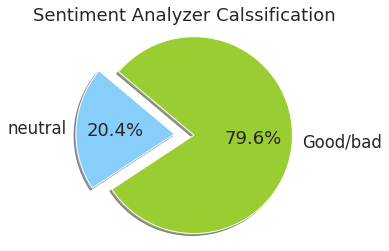

In [ ]:
labels = 'neutral', 'Good/bad'
sizes = [243, 949]
colors = ['lightskyblue','yellowgreen']
explode = (0.2, 0)  # explode 1st slice

# Plot
plt.pie(sizes, explode=explode, labels=labels, colors=colors,
autopct='%1.1f%%', shadow=True, startangle=140)
plt.title('Sentiment Analyzer Calssification')

plt.axis('equal')
plt.show()

In [ ]:
#Get the count of Good/bad review in neutral 
neu_count = reviews_df[reviews_df['neu'] > 0.8]
neu_count.reset_index(drop= True, inplace=True)

for i in range (243):
    if (neu_count['neg'][i] > neu_count['pos'][i]):
      neu_count['is predict review'][i] = 0
    else:
        neu_count['is predict review'][i] = 1  

neu_count['is predict review'].value_counts


/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  
/usr/local/lib/python3.6/dist-packages/IPython/core/interactiveshell.py:2882: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  exec(code_obj, self.user_global_ns, self.user_ns)
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


<bound method IndexOpsMixin.value_counts of 0      1
1      1
2      1
3      1
4      1
      ..
238    1
239    1
240    0
241    1
242    0
Name: is predict review, Length: 243, dtype: int64>

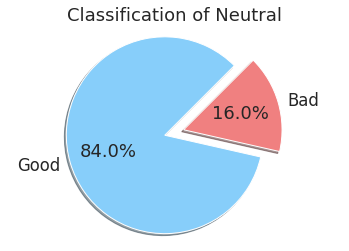

In [ ]:
labels = 'Good', 'Bad'
sizes = [204, 39]
colors = ['lightskyblue','lightcoral']
explode = (0.2, 0)  # explode 1st slice

# Plot
plt.pie(sizes, explode=explode, labels=labels, colors=colors,
autopct='%1.1f%%', shadow=True, startangle=45)
plt.title('Classification of Neutral')

plt.axis('equal')
plt.show()

In [ ]:
# add new columns with zero value
reviews_df['is predict review'] = 0


In [ ]:
# create method to fell predict column 
# set 0 if negative > postive and neutral < 0.9
# else 1
def fell_predict(data):
  for i in range (1192):
    if (data['neg'][i] > data['pos'][i]) & (data['neu'][i] < 0.9):
      data['is predict review'][i] = 0
    else:
        data['is predict review'][i] = 1  
     
  return data 
    

In [ ]:
#call fell_predict methods
reviews_df = fell_predict(reviews_df)
reviews_df['is predict review'].value_counts()

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  import sys
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """


1    1079
0     113
Name: is predict review, dtype: int64

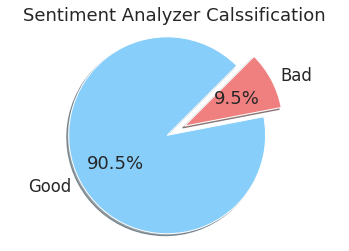

In [ ]:
labels = 'Good', 'Bad'
sizes = [1079, 113]
colors = ['lightskyblue','lightcoral']
explode = (0.2, 0)  # explode 1st slice

# Plot
plt.pie(sizes, explode=explode, labels=labels, colors=colors,
autopct='%1.1f%%', shadow=True, startangle=45)
plt.title('Sentiment Analyzer Calssification')

plt.axis('equal')
plt.show()

In [ ]:
#calculate the accuracy of SentimentIntensityAnalyzer model 
# compar between our classification and classification SentimentIntensityAnalyzer model 
count = 0
for i in range (1192):
    if reviews_df['is predict review'][i] == reviews_df['is good review'][i]:
      count = count + 1  

#-->print(count)
print("the accuracy of of s ", ( (count / 1192) * 100 ))    

the accuracy of of s  87.83557046979867


In [ ]:
#get the most comman word in bad reviews
import numpy as np
bad = reviews_df[reviews_df['is predict review'] == 0]
bad1 = bad['reviews clean']
bad1 = bad1.to_numpy()
word = np.array_str(bad1)

In [ ]:
from nltk import FreqDist
words = nltk.tokenize.word_tokenize(word)
fdist2 = FreqDist(words)

In [ ]:
fdist2.most_common(50)

[('food', 35),
 ('bottle', 31),
 ('``', 27),
 ("''", 27),
 ('go', 25),
 ("'s", 24),
 ('like', 23),
 ('taste', 22),
 ('try', 21),
 ('bitter', 20),
 ('drink', 17),
 ('price', 15),
 ('year', 15),
 ('i', 14),
 ('black', 14),
 ('make', 13),
 ('find', 12),
 ('mix', 12),
 ('good', 11),
 ('sweet', 11),
 ('would', 10),
 ('cherry', 10),
 ('jim', 10),
 ('come', 9),
 ('well', 9),
 ('...', 9),
 ('ever', 9),
 ('store', 9),
 ('even', 9),
 ('one', 9),
 ('dirty', 9),
 ('bad', 8),
 ('buy', 8),
 ('time', 8),
 ('product', 8),
 ('high', 8),
 ('give', 8),
 ('wish', 8),
 ('bean', 8),
 ('want', 8),
 ('first', 8),
 ('red', 8),
 ('stag', 8),
 ('coke', 8),
 ('start', 7),
 ('gift', 7),
 ('plastic', 7),
 ('use', 7),
 ('bar', 7),
 ('order', 7)]

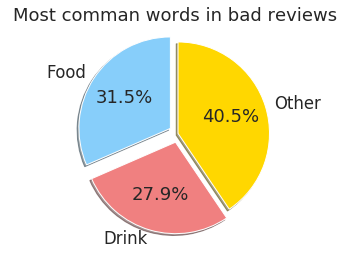

In [ ]:
labels = 'Food', 'Drink','Other'
sizes = [35, 31,45]
colors = ['lightskyblue','lightcoral', 'gold']
explode = (0.1, 0.1, 0.0)  # explode 1st slice

# Plot
plt.pie(sizes, explode=explode, labels=labels, colors=colors,
autopct='%1.1f%%', shadow=True, startangle=90)
plt.title('Most comman words in bad reviews')

plt.axis('equal')
plt.show()